Use an environment that has MNE: https://mne.tools/stable/install/manual_install.html#manual-install

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
#import h5py

from pathlib import Path
import mne

ModuleNotFoundError: No module named 'mne'

In [38]:
filename = Path('../../data/human_pupil/testSF_2024_09_10_14_30.asc')
filename = Path('../../data/human_pupil/testAU_2024_08_22_15_05.asc')
filename = Path('../../data/human_pupil/testPJ_2024_08_22_13_27.asc')
filename = Path('../../data/human_pupil/testUC_2024_09_18_13_21.asc')

# load pupil data:
raw_et = mne.io.read_raw_eyelink(filename)
raw_et_df = raw_et.to_data_frame()
interp_et = mne.preprocessing.eyetracking.interpolate_blinks(raw_et, buffer=(0.05, 0.1), interpolate_gaze=True)
interp_et_df = interp_et.to_data_frame()

# get raw annotations
annot = raw_et.annotations.to_data_frame()
annot['onset'] = raw_et.annotations.onset
annot.head(n=100)

Loading /Users/uraiae/Documents/code/engagement-arousal-ibl/scripts/notebooks/../../data/human_pupil/testUC_2024_09_18_13_21.asc
Pixel coordinate data detected.Pass `scalings=dict(eyegaze=1e3)` when using plot method to make traces more legible.
Pupil-size area detected.
Interpolating missing data during blinks...
Interpolated 3 channels: ['xpos_left', 'ypos_left', 'pupil_left']
Removing 'BAD_' from BAD_blink.


,onset,duration,description,ch_names
0,0.001,0.176,saccade,"(xpos_left, ypos_left, pupil_left)"
1,0.030,0.102,blink,"(xpos_left, ypos_left, pupil_left)"
2,0.108,0.000,EYE_USED 0 LEFT,()
3,0.173,0.000,0 fixation_2_ONSET,()
4,0.177,0.023,fixation,"(xpos_left, ypos_left, pupil_left)"
...,...,...,...,...
479,38.535,0.000,grating_l_OFFSET,()
480,38.535,0.000,TRIAL_RESULT 0,()
481,38.536,0.036,fixation,"(xpos_left, ypos_left, pupil_left)"
482,38.572,0.017,saccade,"(xpos_left, ypos_left, pupil_left)"


['saccade' 'blink' 'EYE_USED 0 LEFT' '0 fixation_2_ONSET' 'fixation'
 '0 grating_r_ONSET' '0 fixation_ONSET' '0 grating_l_ONSET' '0 dot_ONSET'
 'corrAns 1' 'fixation_OFFSET' 'dot_OFFSET' 'grating_l_OFFSET'
 'grating_r_OFFSET' 'TRIAL_RESULT 0' 'TRIALID 2' 'TRIALID 3' 'TRIALID 4'
 'TRIALID 5' 'TRIALID 6' 'corrAns 0' 'TRIALID 7' 'TRIALID 8' 'TRIALID 9'
 'TRIALID 10']


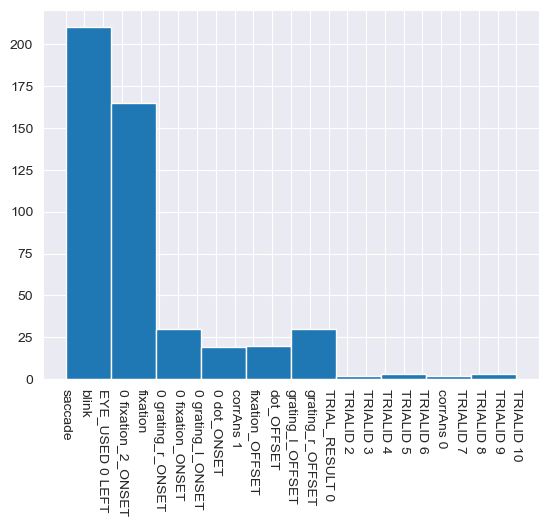

In [39]:
annot['description'].hist(xrot=-90)
print(annot['description'].unique())

In [40]:
# lock to stimulus onset

# get events
events_dict = {"0 grating_l_ONSET": 1}
events, _ = mne.events_from_annotations(raw_et, event_id=events_dict)
epochs = mne.Epochs(interp_et, events,  tmin=-1, tmax=3, baseline=None, preload=True)   
stim_epochs_df = epochs.to_data_frame()

events_dict = {"corrAns 1":1, "corrAns 0":0}
events, _ = mne.events_from_annotations(raw_et, event_id=events_dict)
epochs = mne.Epochs(interp_et, events,  tmin=-1, tmax=3, baseline=None, preload=True)   
fb_epochs_df = epochs.to_data_frame()

Used Annotations descriptions: ['0 grating_l_ONSET']
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 10 events and 4001 original time points ...
2 bad epochs dropped
Used Annotations descriptions: ['corrAns 0', 'corrAns 1']
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 10 events and 4001 original time points ...
1 bad epochs dropped


In [41]:
epochs_df

,time,condition,epoch,xpos_left,ypos_left,pupil_left,DIN
0,-1.000,1,0,720.695620,422.321898,312.875912,127.0
1,-0.999,1,0,721.095134,422.290998,312.973236,127.0
2,-0.998,1,0,721.494647,422.260097,313.070560,127.0
3,-0.997,1,0,721.894161,422.229197,313.167883,127.0
4,-0.996,1,0,722.293674,422.198297,313.265207,127.0
...,...,...,...,...,...,...,...
36004,2.996,1,8,1034.800000,464.900000,295.000000,127.0
36005,2.997,1,8,1034.600000,465.500000,297.000000,127.0
36006,2.998,1,8,1033.800000,466.100000,299.000000,127.0
36007,2.999,1,8,1033.400000,466.500000,300.000000,127.0


/var/folders/ly/drwv1q0j4t977rvf2rqyvvq8gsq3lc/T/ipykernel_4921/261648199.py:34: UserWarning: The figure layout has changed to tight
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])


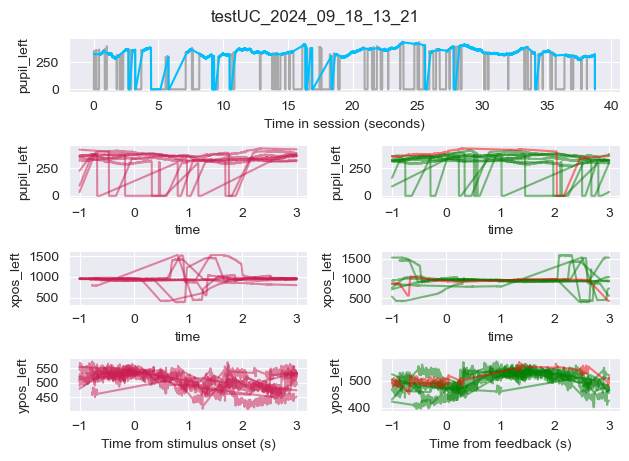

In [57]:
# make a snapshot figure
sns.set_style('darkgrid')
fig, axes = plt.subplot_mosaic([['a', 'a'], ['b', 'c'], ['d', 'e'], ['f', 'g']],
                              layout='constrained')

#sns.lineplot(, x='time', y='pupil_left')
sns.lineplot(raw_et_df, x='time', y='pupil_left', color='darkgrey', ax=axes['a'])
sns.lineplot(interp_et_df, x='time', y='pupil_left', color='deepskyblue', ax=axes['a'])
axes['a'].set_xlabel('Time in session (seconds)')

# stimulus-locked pupil
for axn, var in zip(['b', 'd', 'f'], ['pupil_left', 'xpos_left', 'ypos_left']):
    sns.lineplot(data=stim_epochs_df, x='time', y=var, estimator=None, 
                 hue='condition', palette='rocket', alpha=0.5,
                 legend=False,
                 units='epoch', ax=axes[axn])

for axn, var in zip(['c', 'e', 'g'], ['pupil_left', 'xpos_left', 'ypos_left']):
    sns.lineplot(data=fb_epochs_df, x='time', y=var, estimator=None, 
                 hue='condition', legend=False, alpha=0.5,
                 palette=['green', 'red'], hue_order=['1','0'],
                 units='epoch', ax=axes[axn])

# link some axes
axes['b'].sharex(axes['d'])
axes['d'].sharex(axes['f'])
axes['f'].set_xlabel('Time from stimulus onset (s)')

axes['c'].sharex(axes['e'])
axes['e'].sharex(axes['g'])
axes['g'].set_xlabel('Time from feedback (s)')

sns.despine()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

figname = os.path.split(filename)[1].split('.asc')[0]
fig.suptitle(figname)
fig.savefig('../../results/human/' + figname + '.png')

In [32]:
axes['a']

<Axes: label='a'>